In [11]:
import importlib

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.metrics import mean_squared_error, roc_auc_score, make_scorer, roc_curve, auc

In [13]:
from lambda_func import *
from regression_models import *
from utils import *
import My_Model_Class
import My_Table_Plotter_Class

Some variables

In [14]:
data_df_path = '../result/data.xlsx'
score_df_path = '../data/SME_dataset.csv'
connect_flag_df_path = '../result/connect_flag_df_threshold_%s.csv'

lambda_select_fun_list = [lambda_min_func, lambda_1se_func]
# We used one lambda func here
lambda_func = lambda_min_func

# you can add other models in ./code/regression_models.py
model_func_list = [get_ElasticNet]
model_name_list = ["ElasticNet"]

threshold_list = [0.05, 0.1]

If you have set up all the variables, just run the code in the following

In [15]:
# data after processing
X = pd.read_excel(data_df_path, index_col = 0).values

# initial data
# X = pd.read_csv(score_df_path, index_col = 0).drop(['X1', 'status'], axis=1).values

y = pd.read_csv(score_df_path, index_col = 0)['status'].values

In [16]:
model_dict = dict(zip(model_name_list, model_func_list))

In [17]:
# you can ignore this part
connect_name_list = ["CSM", "NS-CSM(C)", "NS-CSM(NC)"]
threshold_dict = dict()
for threshold in threshold_list:
    cur_connect_flag_df_path = connect_flag_df_path % (str(threshold))
    connect_flag_df = pd.read_csv(cur_connect_flag_df_path, index_col=0)
    
    all_index = connect_flag_df.index
    connect_index = connect_flag_df[connect_flag_df.connect_flag==1].index
    non_connect_index = connect_flag_df[connect_flag_df.connect_flag==0].index

    my_index_list = [all_index, connect_index, non_connect_index]

    index_dict = dict(zip(connect_name_list, my_index_list))
    
    threshold_dict[threshold] = index_dict

Fit Model

In [18]:
importlib.reload(My_Model_Class)

result_model_dict = dict()

for model_name, model_func in model_dict.items():
    
    for threshold, index_dict in threshold_dict.items():

        for index_name, my_index in index_dict.items():
            print(model_name, threshold, index_name)
            
            my_model = My_Model_Class.My_Model(X[my_index], y[my_index], model_func, lambda_func)
            result_model_dict[(model_name, index_name, threshold)] = my_model

ElasticNet 0.05 CSM
ElasticNet 0.05 NS-CSM(C)
ElasticNet 0.05 NS-CSM(NC)


D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Object

ElasticNet 0.1 CSM
ElasticNet 0.1 NS-CSM(C)
ElasticNet 0.1 NS-CSM(NC)


D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Object

Plot Table

In [19]:
importlib.reload(My_Table_Plotter_Class)

my_table_plotter = My_Table_Plotter_Class.My_Table_Plotter(result_model_dict)

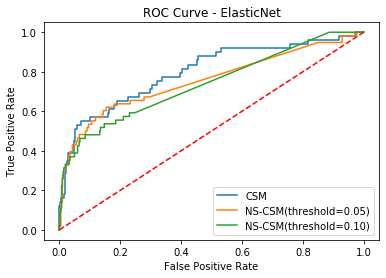

In [20]:
# there is bug in non-connect data
coef_df = my_table_plotter.get_coef_df()
num_of_selected_var_df = my_table_plotter.get_num_of_selected_var_df(threshold=0.1)
my_table_plotter.get_roc_cruve()
roc_df = my_table_plotter.get_roc_df()

# to be finished
# auc_df = my_table_plotter.get_auc_df()